In [61]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

In [62]:
df = pd.read_csv('Ivo Py Data.csv',sep=';')

In [63]:
df

,CODE STORE2,Selling In,Selling Out,Promo Selling Out,Promo Selling Out Rate,Umur Outlet (Bulan),Total Item Transaction,Total Transaction,Is_East,Average Selling In Per Transaction,Average Selling Out Per Month,Average Promo Selling Out By Period,Is Active,Jenis Freezer,Is Alfamart,No Time Transaction
0,013H,2307294,3913784,606937,0.16,36,26,3,0,769098,782757,75867,1,1,0,18
1,014H,5044074,7000001,830181,0.12,32,30,4,0,1261019,1400000,103773,1,1,0,18
2,016H,3358670,7086128,1731893,0.24,15,29,4,0,839668,1417226,216487,1,1,0,14
3,004H,6116137,6385587,1487028,0.23,45,32,5,0,1223227,1277117,185878,1,1,0,15
4,008H,6101340,8155948,1800992,0.22,45,30,6,0,1016890,1631190,225124,1,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,W563,893519,1447658,655406,0.45,24,7,3,0,297840,289532,81926,1,0,1,2
2259,W597,2050931,1973333,914324,0.46,23,11,5,0,410186,394667,114291,1,0,1,3
2260,W661,1181055,1044955,563333,0.54,26,8,3,0,393685,208991,70417,1,0,1,4
2261,W785,1505823,711081,617297,0.87,7,6,3,0,501941,142216,77162,1,0,1,2


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CODE STORE2                          2263 non-null   object 
 1   Selling In                           2263 non-null   int64  
 2   Selling Out                          2263 non-null   int64  
 3   Promo Selling Out                    2263 non-null   int64  
 4   Promo Selling Out Rate               2263 non-null   float64
 5   Umur Outlet (Bulan)                  2263 non-null   int64  
 6   Total Item Transaction               2263 non-null   int64  
 7   Total Transaction                    2263 non-null   int64  
 8   Is_East                              2263 non-null   int64  
 9   Average Selling In Per Transaction   2263 non-null   int64  
 10  Average Selling Out Per Month        2263 non-null   int64  
 11  Average Promo Selling Out By P

In [65]:
cols_to_convert = ['Selling In', 'Promo Selling Out', 'Promo Selling Out Rate','Average Selling In Per Transaction','Average Selling Out Per Month','Average Promo Selling Out By Period']

In [66]:
df[cols_to_convert] = df[cols_to_convert].replace({',': ''}, regex=True)  # Menghapus koma ribuan
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [67]:
df

,CODE STORE2,Selling In,Selling Out,Promo Selling Out,Promo Selling Out Rate,Umur Outlet (Bulan),Total Item Transaction,Total Transaction,Is_East,Average Selling In Per Transaction,Average Selling Out Per Month,Average Promo Selling Out By Period,Is Active,Jenis Freezer,Is Alfamart,No Time Transaction
0,013H,2307294,3913784,606937,0.16,36,26,3,0,769098,782757,75867,1,1,0,18
1,014H,5044074,7000001,830181,0.12,32,30,4,0,1261019,1400000,103773,1,1,0,18
2,016H,3358670,7086128,1731893,0.24,15,29,4,0,839668,1417226,216487,1,1,0,14
3,004H,6116137,6385587,1487028,0.23,45,32,5,0,1223227,1277117,185878,1,1,0,15
4,008H,6101340,8155948,1800992,0.22,45,30,6,0,1016890,1631190,225124,1,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,W563,893519,1447658,655406,0.45,24,7,3,0,297840,289532,81926,1,0,1,2
2259,W597,2050931,1973333,914324,0.46,23,11,5,0,410186,394667,114291,1,0,1,3
2260,W661,1181055,1044955,563333,0.54,26,8,3,0,393685,208991,70417,1,0,1,4
2261,W785,1505823,711081,617297,0.87,7,6,3,0,501941,142216,77162,1,0,1,2


In [68]:
df.shape[0]

2263

In [69]:
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
df['Outlier_Scores'] = model.fit_predict(df.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
df['Is_Outlier'] = [1 if x == -1 else 0 for x in df['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
df.head()

,CODE STORE2,Selling In,Selling Out,Promo Selling Out,Promo Selling Out Rate,Umur Outlet (Bulan),Total Item Transaction,Total Transaction,Is_East,Average Selling In Per Transaction,Average Selling Out Per Month,Average Promo Selling Out By Period,Is Active,Jenis Freezer,Is Alfamart,No Time Transaction,Outlier_Scores,Is_Outlier
0,013H,2307294,3913784,606937,0.16,36,26,3,0,769098,782757,75867,1,1,0,18,1,0
1,014H,5044074,7000001,830181,0.12,32,30,4,0,1261019,1400000,103773,1,1,0,18,1,0
2,016H,3358670,7086128,1731893,0.24,15,29,4,0,839668,1417226,216487,1,1,0,14,1,0
3,004H,6116137,6385587,1487028,0.23,45,32,5,0,1223227,1277117,185878,1,1,0,15,1,0
4,008H,6101340,8155948,1800992,0.22,45,30,6,0,1016890,1631190,225124,1,1,0,10,-1,1


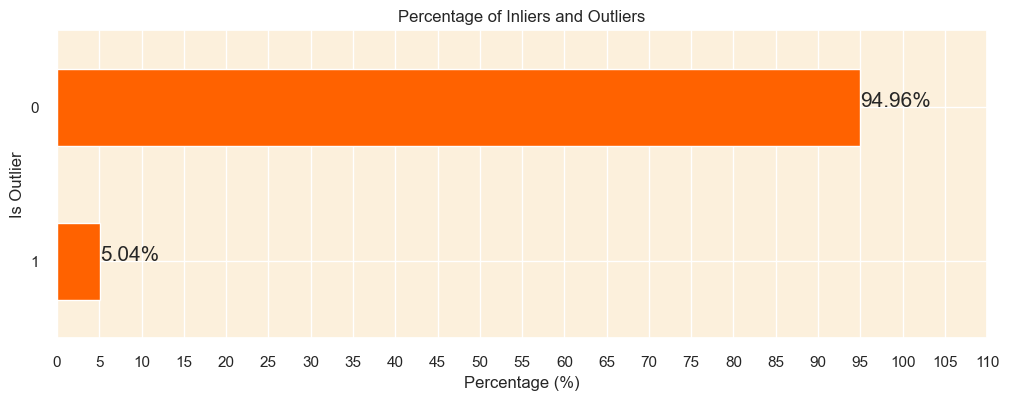

In [70]:
outlier_percentage = df['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [71]:
# Separate the outliers for analysis
outliers_data = df[df['Is_Outlier'] == 1]
# Remove the outliers from the main dataset
df_cleaned = df[df['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
df_cleaned = df_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
df_cleaned.reset_index(drop=True, inplace=True)

In [72]:
df_cleaned.shape[0]

2149

In [73]:
df_cleaned

,CODE STORE2,Selling In,Selling Out,Promo Selling Out,Promo Selling Out Rate,Umur Outlet (Bulan),Total Item Transaction,Total Transaction,Is_East,Average Selling In Per Transaction,Average Selling Out Per Month,Average Promo Selling Out By Period,Is Active,Jenis Freezer,Is Alfamart,No Time Transaction
0,013H,2307294,3913784,606937,0.16,36,26,3,0,769098,782757,75867,1,1,0,18
1,014H,5044074,7000001,830181,0.12,32,30,4,0,1261019,1400000,103773,1,1,0,18
2,016H,3358670,7086128,1731893,0.24,15,29,4,0,839668,1417226,216487,1,1,0,14
3,004H,6116137,6385587,1487028,0.23,45,32,5,0,1223227,1277117,185878,1,1,0,15
4,010H,4182719,5693064,921532,0.16,45,30,5,0,836544,1138613,115192,1,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,W563,893519,1447658,655406,0.45,24,7,3,0,297840,289532,81926,1,0,1,2
2145,W597,2050931,1973333,914324,0.46,23,11,5,0,410186,394667,114291,1,0,1,3
2146,W661,1181055,1044955,563333,0.54,26,8,3,0,393685,208991,70417,1,0,1,4
2147,W785,1505823,711081,617297,0.87,7,6,3,0,501941,142216,77162,1,0,1,2


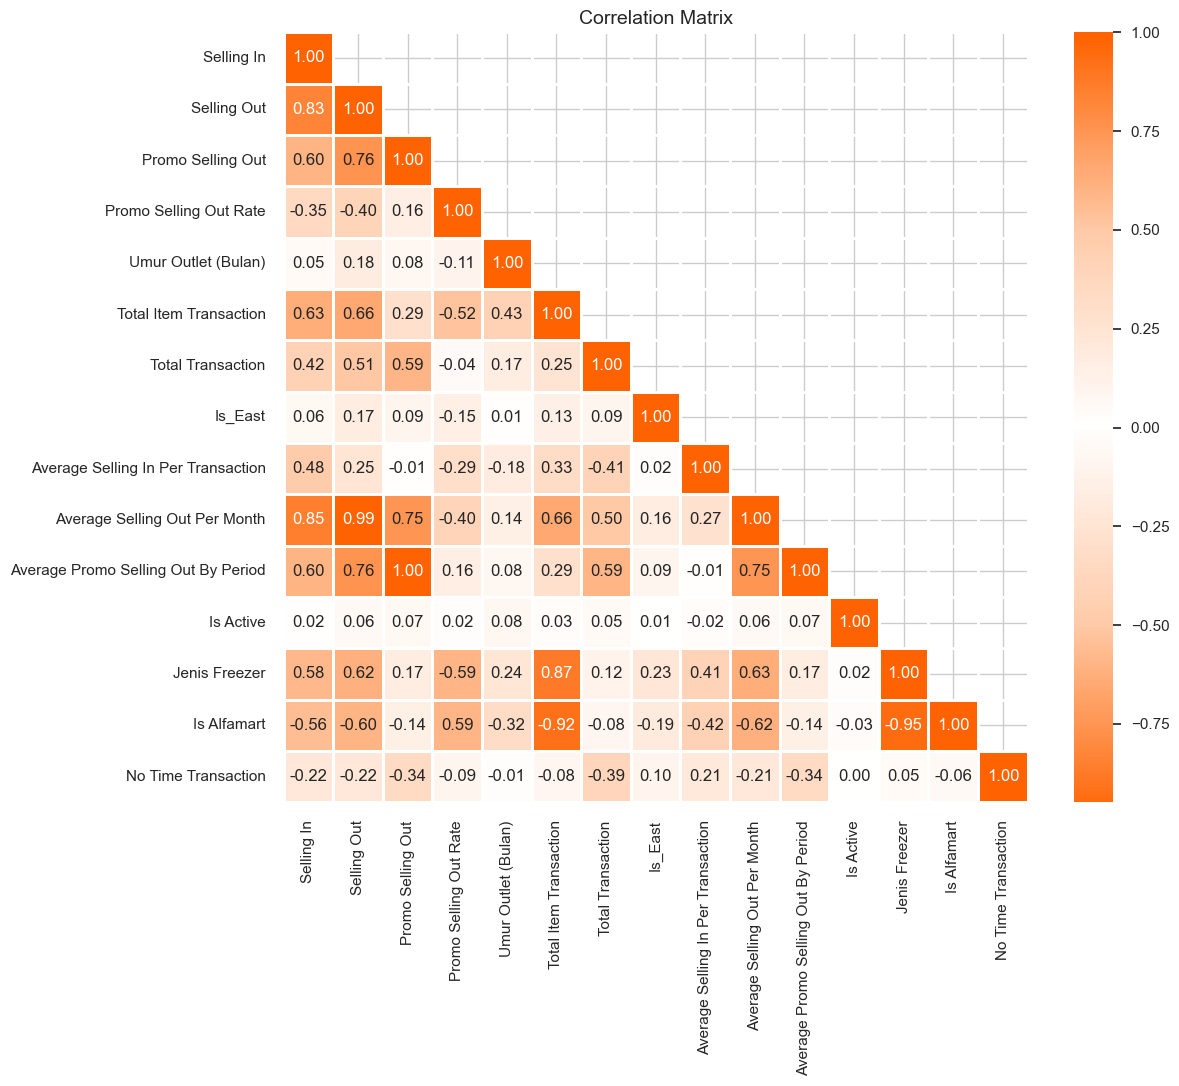

In [74]:
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = df_cleaned.drop(columns=['CODE STORE2']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [75]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CODE STORE2', 'Is_Alfamart', 'Is_Active','Is_East','Jenis Freezer','Promo Selling Out Rate']

# List of columns that need to be scaled
columns_to_scale = df_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
df_scaled = df_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Display the first few rows of the scaled data
df_scaled.head()

,CODE STORE2,Selling In,Selling Out,Promo Selling Out,Promo Selling Out Rate,Umur Outlet (Bulan),Total Item Transaction,Total Transaction,Is_East,Average Selling In Per Transaction,Average Selling Out Per Month,Average Promo Selling Out By Period,Is Active,Jenis Freezer,Is Alfamart,No Time Transaction
0,013H,0.201161,1.238407,-0.088651,0.16,0.908571,1.743649,-0.738378,0,0.942596,1.208485,-0.088653,0.089296,1,-2.078294,-0.315004
1,014H,2.554407,3.308879,0.475687,0.12,0.453624,2.244598,-0.379947,0,2.545252,3.247886,0.475694,0.089296,1,-2.078294,-0.315004
2,016H,1.105197,3.366660,2.755119,0.24,-1.479902,2.119361,-0.379947,0,1.172509,3.304802,2.755127,0.089296,1,-2.078294,-0.476758
3,004H,3.476231,2.896683,2.136126,0.23,1.932203,2.495073,-0.021516,0,2.422127,2.841875,2.136116,0.089296,1,-2.078294,-0.436320
4,010H,1.813763,2.432085,0.706612,0.16,1.932203,2.244598,-0.021516,0,1.162332,2.384251,0.706623,0.089296,1,-2.078294,-0.719390


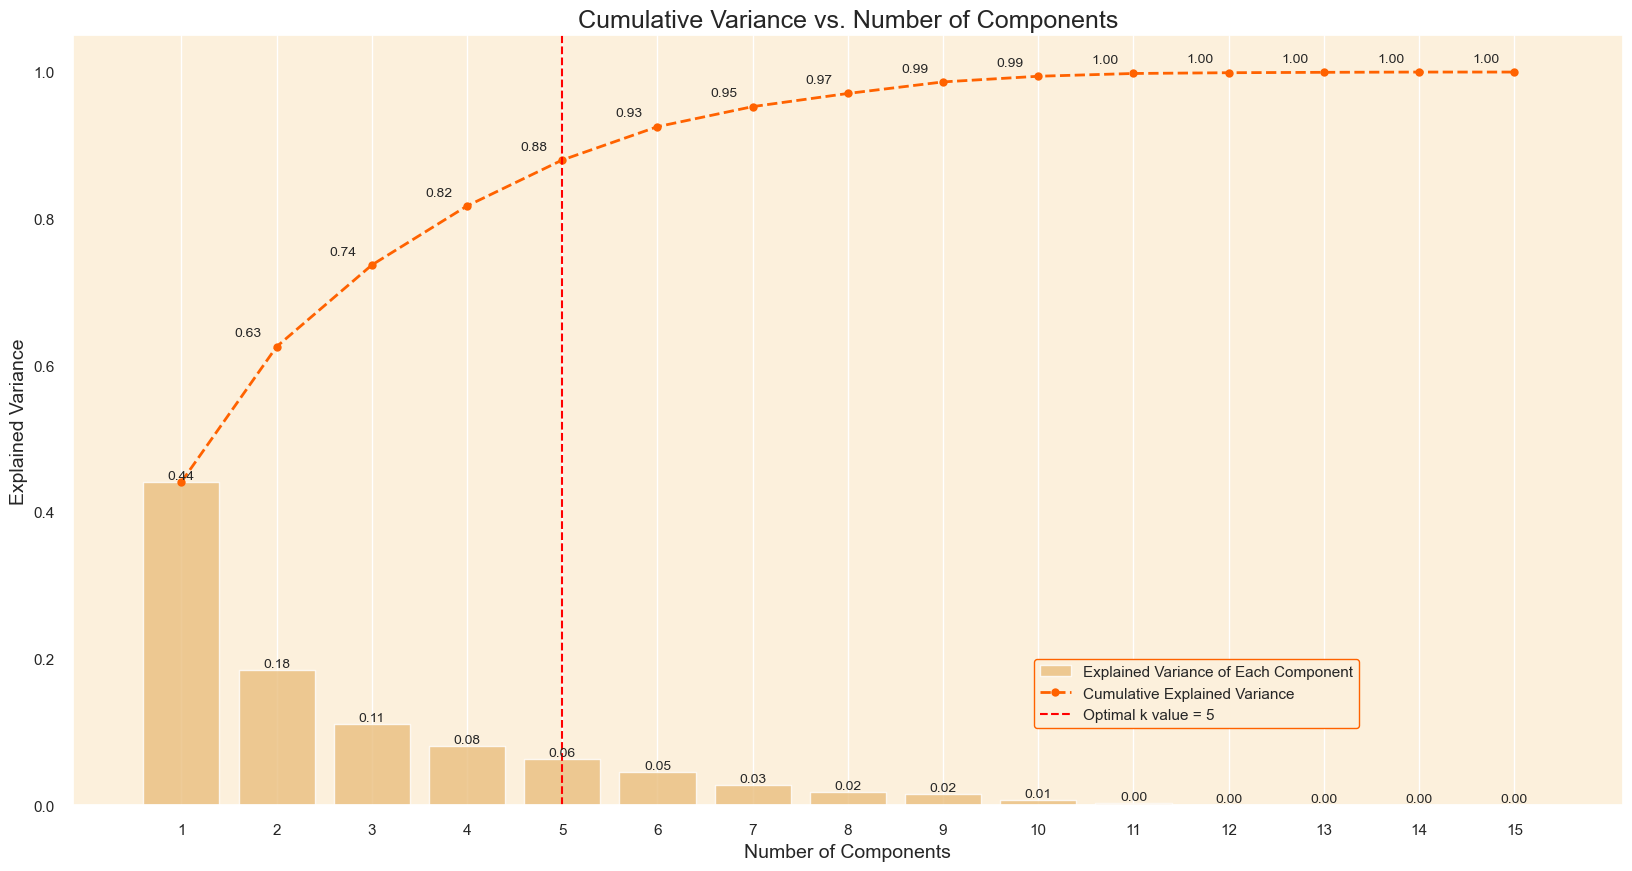

In [76]:
# Setting CustomerID as the index column
df_scaled.set_index('CODE STORE2', inplace=True)

# Apply PCA
pca = PCA().fit(df_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 5)
optimal_k = 5

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [77]:
# Creating a PCA object with 6 components
pca = PCA(n_components=5)

# Fitting and transforming the original data to the new PCA dataframe
df_pca = pca.fit_transform(df_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_pca = pd.DataFrame(df_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_pca.index = df_scaled.index

In [78]:
df_pca

,PC1,PC2,PC3,PC4,PC5
CODE STORE2,,,,,
013H,2.280333,2.382159,0.833714,-0.155036,-0.641811
014H,5.604242,3.049399,-0.965590,0.018913,-0.680418
016H,6.292778,0.619352,-2.119740,0.317342,0.184144
004H,7.062846,2.057496,-0.363782,0.114208,0.074045
010H,4.914363,2.015285,1.014615,-0.222785,-0.505425
...,...,...,...,...,...
W563,-1.242997,-0.945516,-0.178684,-0.005338,-0.711262
W597,0.219750,-1.181176,-0.589862,0.024943,-0.558557
W661,-1.444628,-0.559366,-0.074500,-0.030189,-0.825011


In [79]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=df_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5
Selling In,0.373067,0.097965,-0.206181,-0.021358,-0.111232
Selling Out,0.411216,0.007286,-0.060685,0.018082,0.088205
Promo Selling Out,0.340025,-0.309606,-0.153887,0.076081,0.223949
Promo Selling Out Rate,-0.016286,-0.040255,-0.012181,0.010204,0.017172
Umur Outlet (Bulan),0.103683,0.076686,0.697952,-0.024823,0.194754
Total Item Transaction,0.317417,0.328158,0.280483,-0.091526,-0.135968
Total Transaction,0.247638,-0.382529,0.219258,-0.077395,0.023790
Is_East,0.032606,0.026057,0.013564,0.011793,0.099092
Average Selling In Per Transaction,0.106632,0.459085,-0.462220,0.077713,-0.122869
Average Selling Out Per Month,0.411224,0.020255,-0.086322,0.019151,0.065484


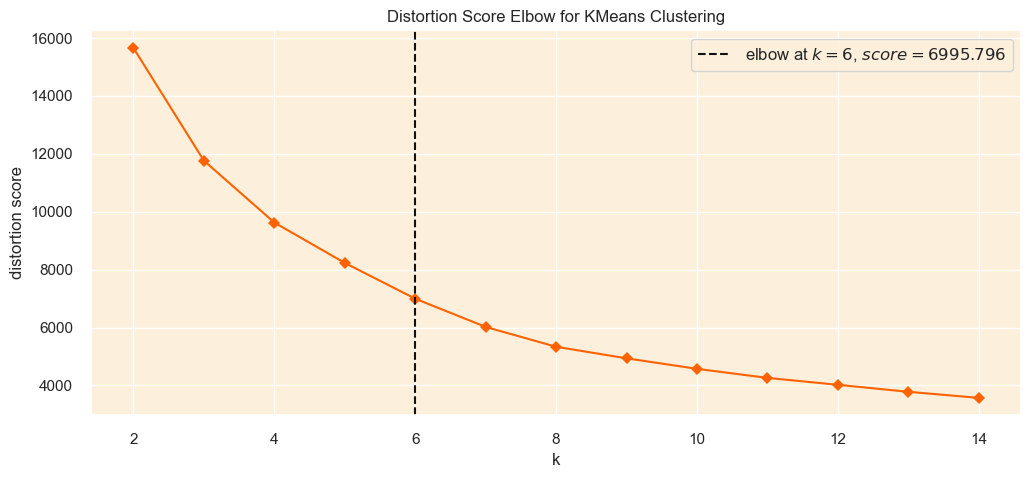

In [80]:
#Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Finalize and render the figure
visualizer.show();

In [81]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

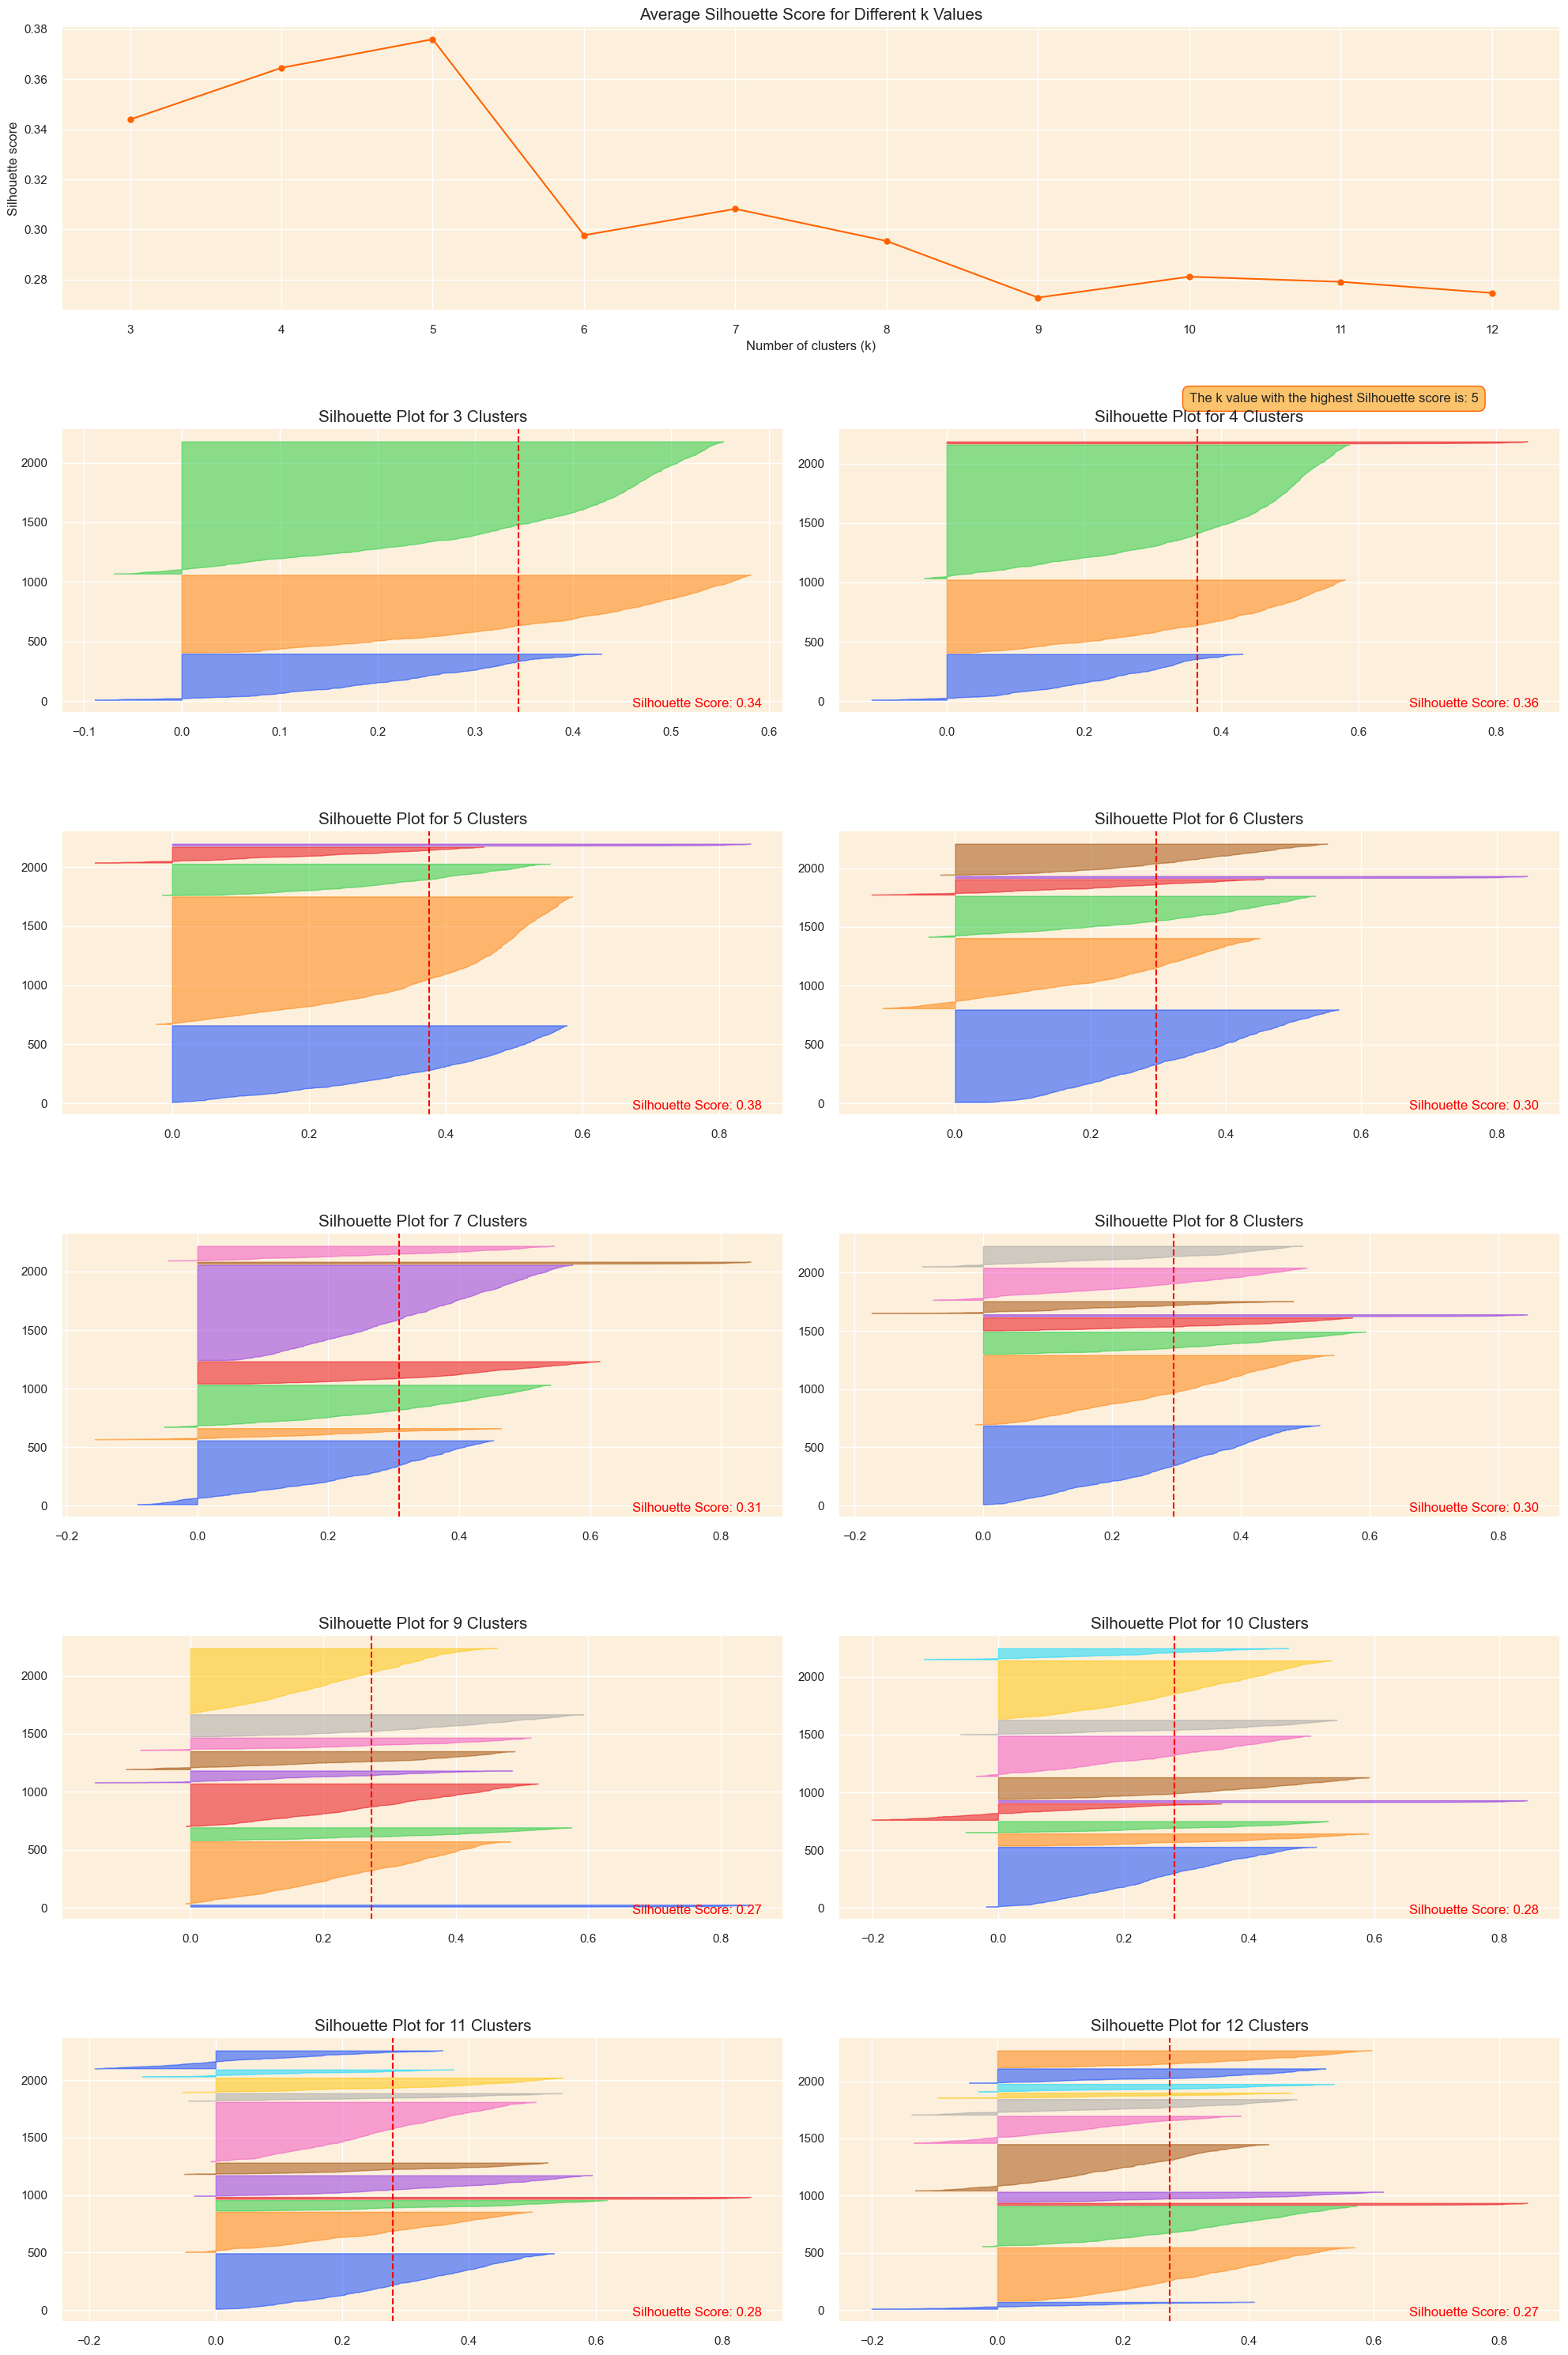

In [82]:
silhouette_analysis(df_pca, 3, 12, figsize=(20, 50))

In [83]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_pca)
# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)
# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}
# Reverse the mapping to assign labels as per your criteria
# Adjust the mapping according to your specific needs for 5 clusters
label_mapping = {v: k for k, v in {4: 0, 3: 1, 2: 2, 1: 3, 0: 4}.items()}
# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])
# Append the new cluster labels back to the original dataset
df_cleaned['cluster'] = new_labels
# Append the new cluster labels to the PCA version of the dataset
df_pca['cluster'] = new_labels

In [84]:
df_cleaned.head()

,CODE STORE2,Selling In,Selling Out,Promo Selling Out,Promo Selling Out Rate,Umur Outlet (Bulan),Total Item Transaction,Total Transaction,Is_East,Average Selling In Per Transaction,Average Selling Out Per Month,Average Promo Selling Out By Period,Is Active,Jenis Freezer,Is Alfamart,No Time Transaction,cluster
0,013H,2307294,3913784,606937,0.16,36,26,3,0,769098,782757,75867,1,1,0,18,2
1,014H,5044074,7000001,830181,0.12,32,30,4,0,1261019,1400000,103773,1,1,0,18,1
2,016H,3358670,7086128,1731893,0.24,15,29,4,0,839668,1417226,216487,1,1,0,14,1
3,004H,6116137,6385587,1487028,0.23,45,32,5,0,1223227,1277117,185878,1,1,0,15,1
4,010H,4182719,5693064,921532,0.16,45,30,5,0,836544,1138613,115192,1,1,0,8,2


In [85]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff', '#ffcc00', '#8a2be2']  # Added colors for 5 clusters
# Create separate data frames for each cluster
cluster_0 = df_pca[df_pca['cluster'] == 0]
cluster_1 = df_pca[df_pca['cluster'] == 1]
cluster_2 = df_pca[df_pca['cluster'] == 2]
cluster_3 = df_pca[df_pca['cluster'] == 3]
cluster_4 = df_pca[df_pca['cluster'] == 4]
# Create a 3D scatter plot
fig = go.Figure()
# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))
fig.add_trace(go.Scatter3d(x=cluster_3['PC1'], y=cluster_3['PC2'], z=cluster_3['PC3'], 
                           mode='markers', marker=dict(color=colors[3], size=5, opacity=0.4), name='Cluster 3'))
fig.add_trace(go.Scatter3d(x=cluster_4['PC1'], y=cluster_4['PC2'], z=cluster_4['PC3'], 
                           mode='markers', marker=dict(color=colors[4], size=5, opacity=0.4), name='Cluster 4'))
# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

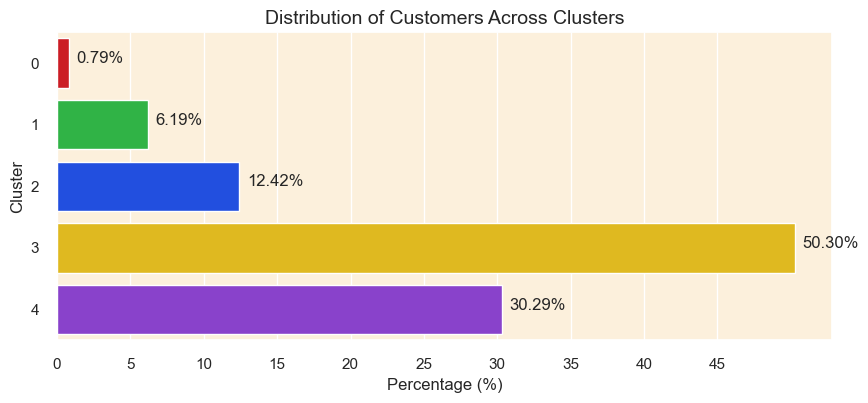

In [86]:
cluster_percentage = (df_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [87]:
# Compute number of customers
num_observations = len(df_pca)

# Separate the features and the cluster labels
X = df_pca.drop('cluster', axis=1)
clusters = df_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        2149        |
|    Silhouette Score     | 0.3759902723588081 |
| Calinski Harabasz Score | 993.9081105082639  |
|  Davies Bouldin Score   | 0.9535023439205776 |
+-------------------------+--------------------+


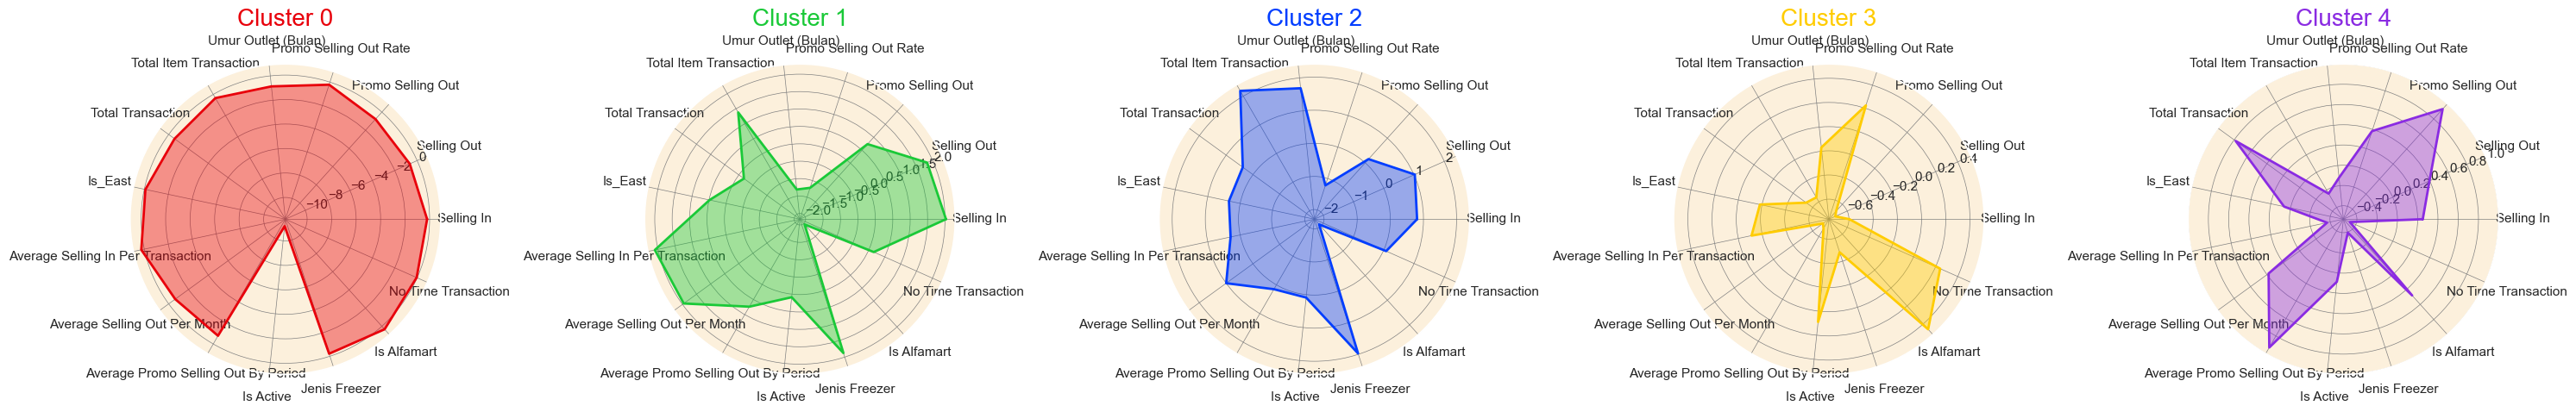

In [88]:

# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = df_cleaned.set_index('CODE STORE2')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure with a larger size
fig, ax = plt.subplots(figsize=(30, 15), subplot_kw=dict(polar=True), nrows=1, ncols=5)  # Increased size

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
for i in range(5):  # Loop through all 5 axes
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])

# Add a grid
for i in range(5):  # Loop through all 5 axes
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


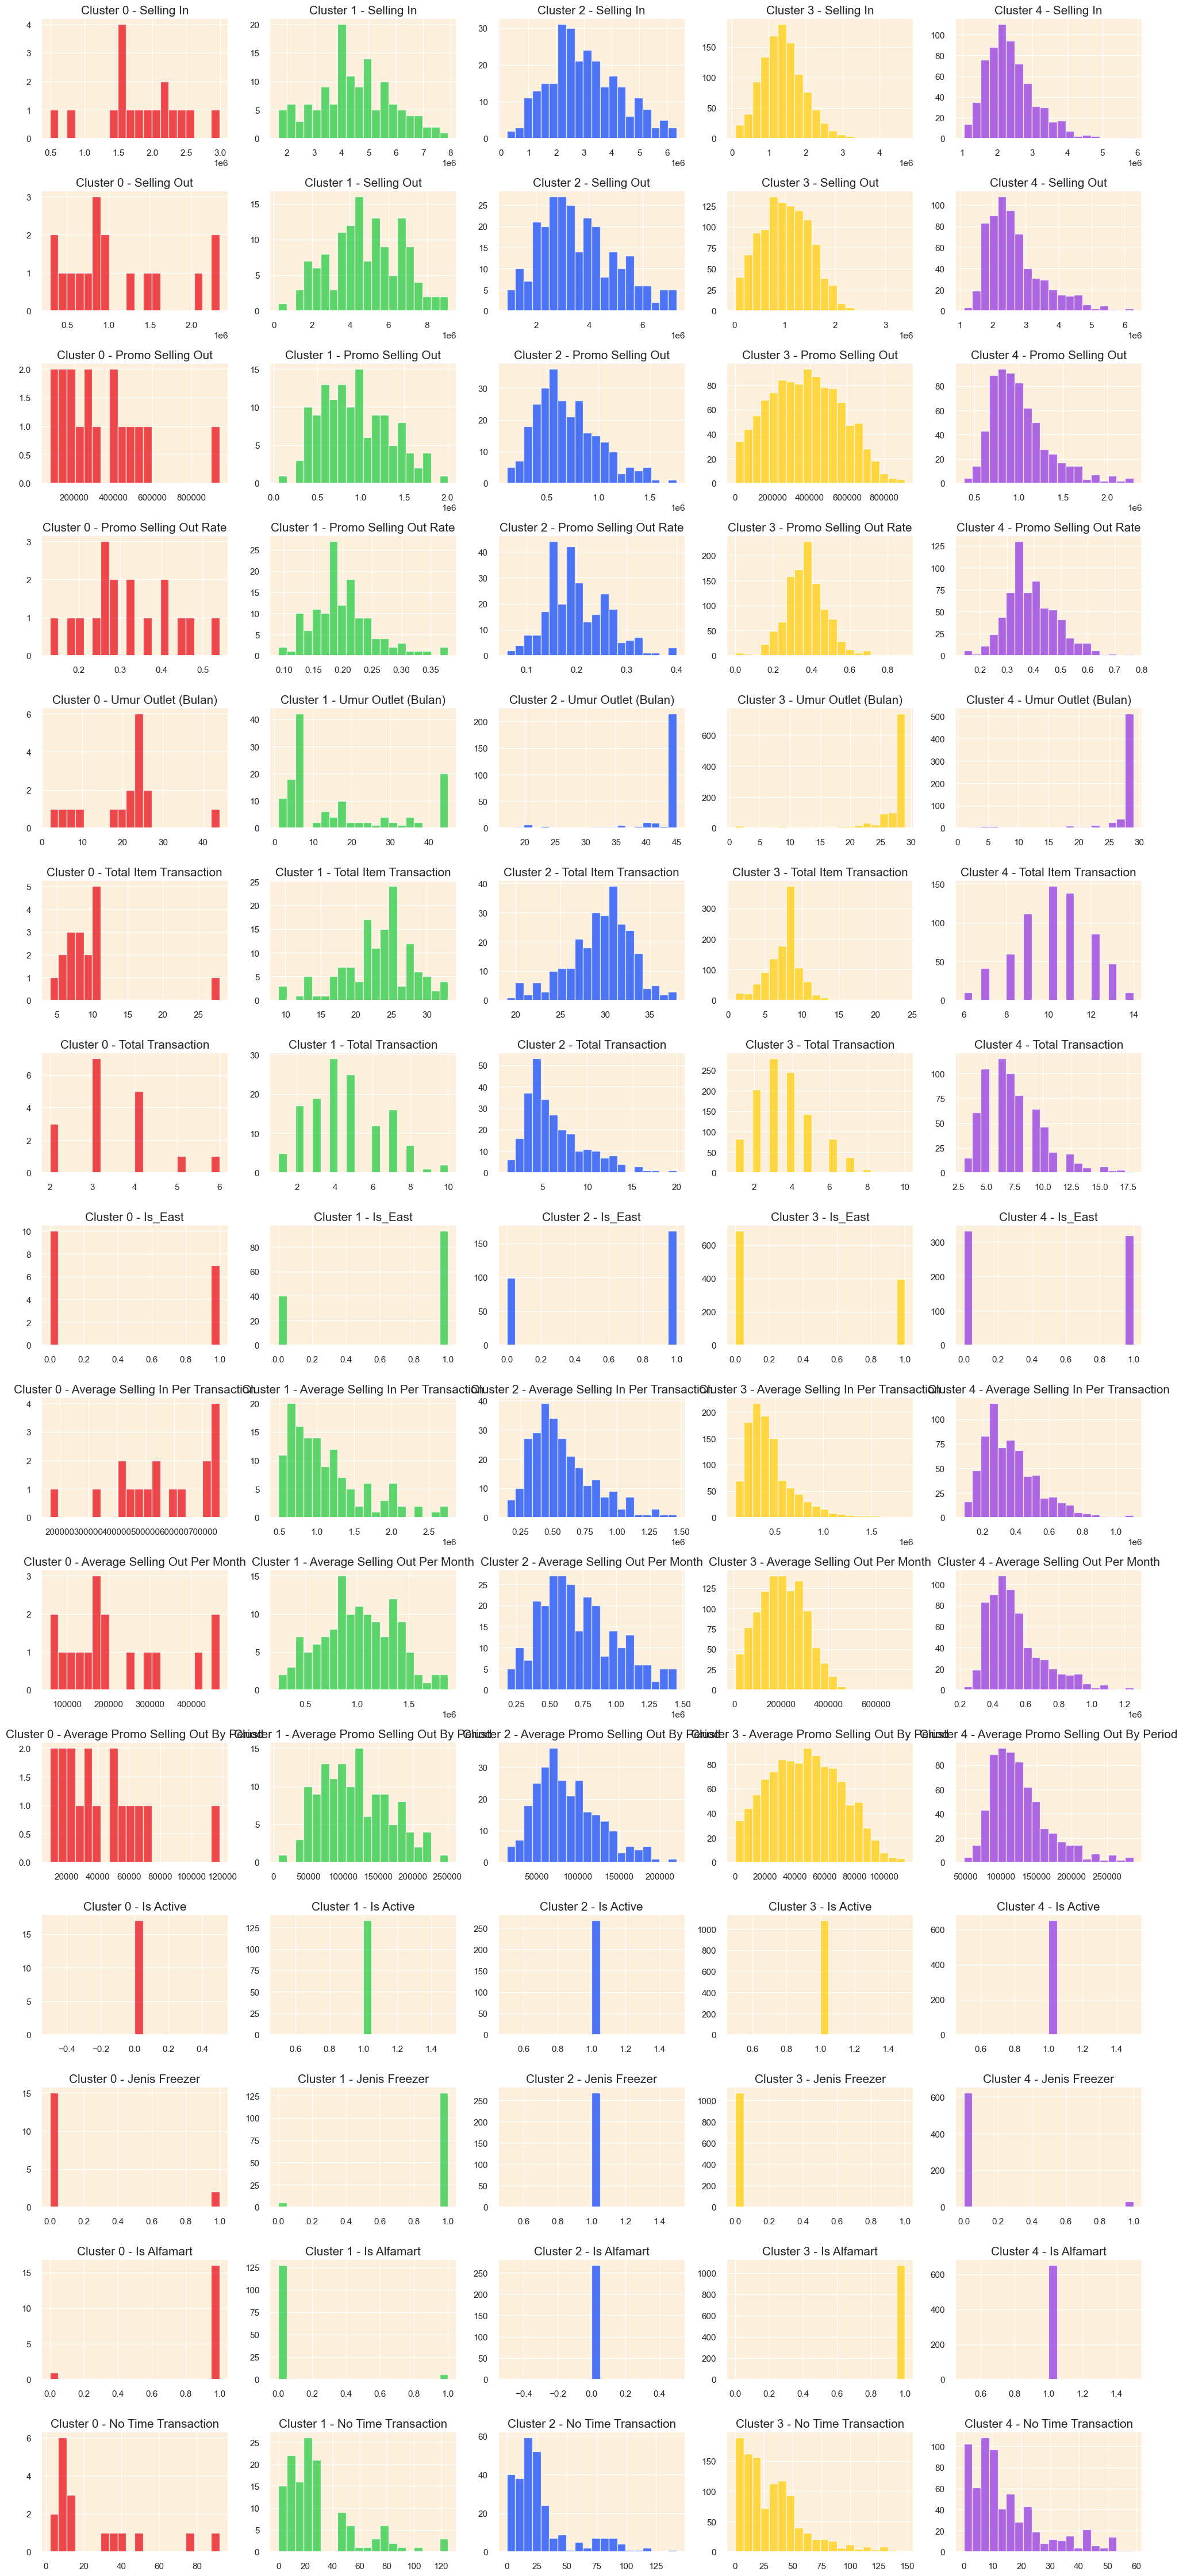

In [89]:
# Plot histograms for each feature segmented by the clusters
features = df_cleaned.columns[1:-1]
clusters = df_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_cleaned[df_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()


In [90]:
import pandas as pd

# Misalkan df adalah DataFrame yang ingin kamu simpan
# df = pd.DataFrame(...)  # DataFrame kamu

# Menyimpan ke file Excel
df_cleaned.to_excel('df_cleaned.xlsx', index=False)  # index=False agar index tidak disertakan


PermissionError: [Errno 13] Permission denied: 'df_cleaned.xlsx'